<a href="https://colab.research.google.com/github/sebastianduhe/Introduccion-a-la-IA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEGUNDA** **ENTREGA**


###**Librerias**:
- Instalamos las librerias necesarias

In [ ]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import json

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


### **Datos**:
- Cargamos los datos de la competencia directamente desde Kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

data = {"username":"baelfire","key":"b860190c7605c03bb89762805f39fb7f"}
with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

## Descargamos base de datos

!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 793MB/s]


In [ ]:
## Descomprimimos

!unzip \*.zip && rm *.zip
!wc *.csv

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               
   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [ ]:
## Leer la base de datos

bd = pd.read_csv("train.csv")
print ("shape of loaded dataframe", bd.shape)

shape of loaded dataframe (692500, 21)


### **Información de los datos**

- Vamos a mostrar diferentes observaciones de la base de datos

In [ ]:
## Datos
bd.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
## Cantidad de filas y columnas
bd.shape

(692500, 21)

In [ ]:
## Tipos de datos, información de estos
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [ ]:
## Datos faltantes de cada columna
bd.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


## **Vamos a buscar las variables categóricas y variables númericas de la base de datos.**

In [ ]:
## Acá se muestran todas las variables categóricas que contiene la base de datos

vcat = bd.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables categóricas:", vcat)

Variables categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


In [ ]:
## Acá observamos cuantos valores diferentes tiene cada variable categórica

for column in vcat:
    unique_count = bd[column].nunique()
    print(f"Variable: {column}, Número de valores únicos: {unique_count}")

Variable: ESTU_PRGM_ACADEMICO, Número de valores únicos: 948
Variable: ESTU_PRGM_DEPARTAMENTO, Número de valores únicos: 31
Variable: ESTU_VALORMATRICULAUNIVERSIDAD, Número de valores únicos: 8
Variable: ESTU_HORASSEMANATRABAJA, Número de valores únicos: 5
Variable: FAMI_ESTRATOVIVIENDA, Número de valores únicos: 7
Variable: FAMI_TIENEINTERNET, Número de valores únicos: 2
Variable: FAMI_EDUCACIONPADRE, Número de valores únicos: 12
Variable: FAMI_TIENELAVADORA, Número de valores únicos: 2
Variable: FAMI_TIENEAUTOMOVIL, Número de valores únicos: 2
Variable: ESTU_PRIVADO_LIBERTAD, Número de valores únicos: 2
Variable: ESTU_PAGOMATRICULAPROPIO, Número de valores únicos: 2
Variable: FAMI_TIENECOMPUTADOR, Número de valores únicos: 2
Variable: FAMI_TIENEINTERNET.1, Número de valores únicos: 2
Variable: FAMI_EDUCACIONMADRE, Número de valores únicos: 12
Variable: RENDIMIENTO_GLOBAL, Número de valores únicos: 4


In [ ]:
## Acá se muestran todas las variables númericas que contiene la base de datos

vnum = bd.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variables númericas:", vnum)

Variables númericas: ['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [ ]:
## Acá observamos cuantos valores diferentes tiene cada variable númerica

for column in vnum:
    unique_count = bd[column].nunique()
    print(f"Variable: {column}, Número de valores únicos: {unique_count}")

Variable: ID, Número de valores únicos: 692500
Variable: PERIODO, Número de valores únicos: 9
Variable: coef_1, Número de valores únicos: 375
Variable: coef_2, Número de valores únicos: 342
Variable: coef_3, Número de valores únicos: 196
Variable: coef_4, Número de valores únicos: 276


### **Despues de mirar las variables categóricas y númericas vamos a rellenar los valores faltantes para que la base de datos quede completa y no tenga ningún valor faltante.**

In [ ]:
## Para eso debemos crear una copia de la base de datos, para no unir bases de datos

bd2 = bd.copy()

In [ ]:
## Vamos a buscar los valores más comunes

vc = bd2[vcat].mode().iloc[0]
print(vc)

ESTU_PRGM_ACADEMICO                                              DERECHO
ESTU_PRGM_DEPARTAMENTO                                            BOGOTÁ
ESTU_VALORMATRICULAUNIVERSIDAD    Entre 1 millón y menos de 2.5 millones
ESTU_HORASSEMANATRABAJA                                  Más de 30 horas
FAMI_ESTRATOVIVIENDA                                           Estrato 2
FAMI_TIENEINTERNET                                                    Si
FAMI_EDUCACIONPADRE                   Secundaria (Bachillerato) completa
FAMI_TIENELAVADORA                                                    Si
FAMI_TIENEAUTOMOVIL                                                   No
ESTU_PRIVADO_LIBERTAD                                                  N
ESTU_PAGOMATRICULAPROPIO                                              No
FAMI_TIENECOMPUTADOR                                                  Si
FAMI_TIENEINTERNET.1                                                  Si
FAMI_EDUCACIONMADRE                   Secundaria (B

In [ ]:
## Acá rellenamos todos los datos faltantes

for column in vcat:
  bd2[column].fillna(vc[column], inplace=True)

<ipython-input-15-7b096166a3c4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd2[column].fillna(vc[column], inplace=True)


In [ ]:
## Volvemos a mirar la base de datos después de agragarle los valores faltantes

bd2.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


Observamos si hay columnas idénticas, es decir, columnas que se repitan más de una vez.

In [ ]:
dup = []
cols = bd2.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if bd2[cols[i]].equals(bd2[cols[j]]):
            dup.append(cols[j])

print("Columnas repetidas:")
print(dup)

Columnas repetidas:
['FAMI_TIENEINTERNET.1']


Observamos que esta repetida la columna 'FAMI_TIENEINTERNET.1', por lo cual vamos a eliminar una de esas.

In [ ]:
def ecr(bd2):
    cols = bd2.columns
    colel = []
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if bd2[cols[i]].equals(bd2[cols[j]]):
                colel.append(cols[j])
    return bd2.drop(columns=colel)


bd2 = ecr(bd2)

Acá vamos a mirar otra vez si ya eliminamos las columnas repetidas.

In [ ]:
dup = []
cols = bd2.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if bd2[cols[i]].equals(bd2[cols[j]]):
            dup.append(cols[j])

print("Columnas repetidas:")
print(dup)

Columnas repetidas:
[]


#### **Antes de normalizar las variables categóricas vamos a buscar las columnas prescindible para eliminarlas**

In [ ]:
#import pandas as pd
#import numpy as np
from sklearn.feature_selection import VarianceThreshold

## Para las variables númericas vamos a eliminarlas si tiene varianza baja
## ya que puede indicar que tiene columnas con poca variación de datos

numbd = bd2[vnum]
selector = VarianceThreshold(threshold=0.01)
selector.fit(numbd)
bajav = numbd.columns[~selector.get_support()].tolist()
print("Columnas numéricas prescindibles por baja varianza (<0.01):", bajav)

Columnas numéricas prescindibles por baja varianza (<0.01): ['coef_2', 'coef_3', 'coef_4']


In [ ]:
## Para evitar errores vamos a hacer las variables categoricas pero con la base de datos nueva que hicimos bd2

vcat2 = bd2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variables categóricas:", vcat2)

Variables categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


In [ ]:
## Ahora sigue las variables categóricas y las vamos a eliminar si los valores están desbalanceadas,
## es decir, si en una columna tiene un valor que representa más del 95% de los datos, si pasa esto esta columna se eliminara.

coldes = 0.95
descat = []
for column in vcat2:
    value_counts = bd2[column].value_counts(normalize=True)
    domcat = value_counts.iloc[0] if not value_counts.empty else 0
    if domcat > coldes:
        descat.append(column)
print("Columnas categóricas prescindibles por distribución desbalanceada (>95% en una categoría):", descat)

Columnas categóricas prescindibles por distribución desbalanceada (>95% en una categoría): ['ESTU_PRIVADO_LIBERTAD']


### **Con los resultados previos, decidimos no eliminar las columnas de los coeficientes 'coef_2', 'coef_3', 'coef_4', ya que no tenemos mucha información al respecto de su utilidad, caso contrario a la columna de 'ESTU_PRIVADO_LIBERTAD', ya que esta nos da una información concreta sobre si el estudiante ha sido privado de su libertad en alguna ocasión y como más del 95% de los estudiantes en la base de datos no les ha pasado podemos considerar que la variable no afecta un análisis que hagamos a esta base de datos.**

<ipython-input-23-cd5ec9ed76a2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = bd2, x='ESTU_PRIVADO_LIBERTAD', ax=axes[0], palette='Set2')


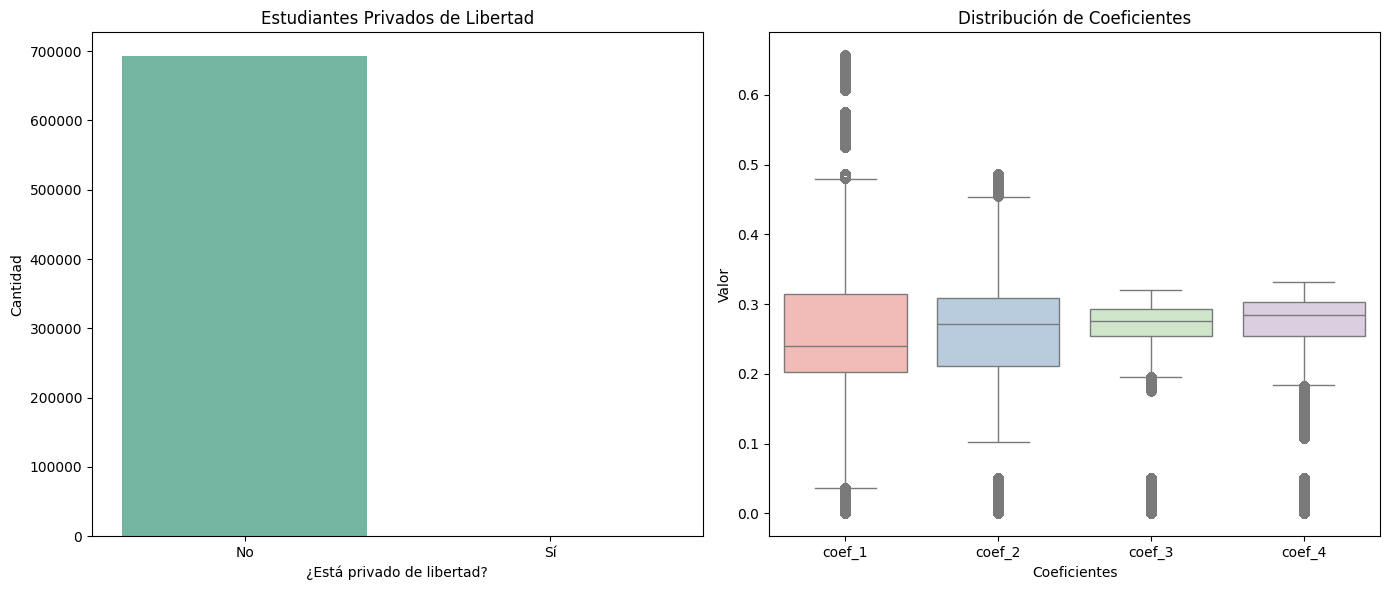

In [ ]:
## La afirmación anterior la podemos corroborar con unas gráficas:

bd2['ESTU_PRIVADO_LIBERTAD'] = bd2['ESTU_PRIVADO_LIBERTAD'].map({'S': 'Sí', 'N': 'No'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: barras - cantidad de estudiantes que han estados privados de la libertad
sns.countplot(data = bd2, x='ESTU_PRIVADO_LIBERTAD', ax=axes[0], palette='Set2')
axes[0].set_title('Estudiantes Privados de Libertad')
axes[0].set_xlabel('¿Está privado de libertad?')
axes[0].set_ylabel('Cantidad')

# Gráfico 2: boxplot de los coeficientes
coef_cols = ['coef_1', 'coef_2', 'coef_3', 'coef_4']
sns.boxplot(data = bd2[coef_cols], ax=axes[1], palette='Pastel1')
axes[1].set_title('Distribución de Coeficientes')
axes[1].set_xlabel('Coeficientes')
axes[1].set_ylabel('Valor')


plt.tight_layout()
plt.show()


Como pudimos observar, con estas gráficas vamos a tomar la desición de eliminar la variable de 'ESTU_PRIVADO_LIBERTAD' y dejar las de los coeficientes

In [ ]:
## Con este código vamos a eliminar la variable ESTU_PRIVADO_LIBERTAD

bd2 = bd2.drop('ESTU_PRIVADO_LIBERTAD', axis=1)

In [ ]:
## Y verificamos la base de datos que haya sido eliminado existosamente

bd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  692500 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         692500 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            692500 non-null  object 
 7   FAMI_TIENEINTERNET              692500 non-null  object 
 8   FAMI_EDUCACIONPADRE             692500 non-null  object 
 9   FAMI_TIENELAVADORA              692500 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             692500 non-null  object 
 11  ESTU_PAGOMATRICULAPROPIO        692500 non-null  object 
 12  FAMI_TIENECOMPUT

In [ ]:
bd2.shape

(692500, 19)

# **Normalización de datos**

## Después de haber depurado la base de datos podemos avanzar en darle valores a nuestras variables categóricas para poder así manejar más fácilmente la base de datos.

#### **Vamos a empezar con las variables binarias, es decir, que solo tienen valores de si o no, para estas vamos a darles valores de:**
#### - Si = 1
#### - No = 0

In [ ]:
## Acá utilizamos el código para ponerle valores a las binarias:

cols_binarias = ['FAMI_TIENEINTERNET',
                 'FAMI_TIENELAVADORA',
                 'FAMI_TIENEAUTOMOVIL',
                 'ESTU_PAGOMATRICULAPROPIO',
                 'FAMI_TIENECOMPUTADOR']

for col in cols_binarias:
    bd2[col] = bd2[col].replace({'Si': 1, 'No': 0})

<ipython-input-27-4273c6ba888b>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd2[col] = bd2[col].replace({'Si': 1, 'No': 0})


In [ ]:
## Tocá verificar si el código funciono, para eso vamos a mostrar los valores de una variable
bd2['ESTU_PAGOMATRICULAPROPIO'].value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
0,388699
1,303801


### **Vamos a seguir clasificando las variables una por una asignandoles valores**

La variable Rendimiento Global le vamos a asignar los valores de la siguiente manera:

- Bajo = 0
- Medio-Bajo = 1
- Medio-Alto = 2
- Alto = 3

In [ ]:
bd2['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [ ]:
## Acá redefinimos los valores de las variables

rendglo = {'bajo': 0,'medio-bajo': 1,'medio-alto': 2,'alto': 3}
bd2["RENDIMIENTO_GLOBAL"] = bd2["RENDIMIENTO_GLOBAL"].replace(rendglo)

<ipython-input-30-9b969be284dc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd2["RENDIMIENTO_GLOBAL"] = bd2["RENDIMIENTO_GLOBAL"].replace(rendglo)


In [ ]:
## Y verificamos

bd2["RENDIMIENTO_GLOBAL"].value_counts()

,count
RENDIMIENTO_GLOBAL,
3,175619
0,172987
1,172275
2,171619


La variable Horas Trabajadas a la Semana le vamos a asignar los valores de la siguiente manera:

- Cero horas trabajadas = 0
- Menos de 10 = 1
- Entre 11 y 20 = 2
- Entre 21 y 30 = 3
- Más de 30 = 4

In [ ]:
bd2['ESTU_HORASSEMANATRABAJA'].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
Más de 30 horas,280209
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [ ]:
## Acá redefinimos los valores de las variables

horsemtra = {'0': 0,'Menos de 10 horas': 1,'Entre 11 y 20 horas': 2,'Entre 21 y 30 horas': 3, 'Más de 30 horas': 4}
bd2["ESTU_HORASSEMANATRABAJA"] = bd2["ESTU_HORASSEMANATRABAJA"].replace(horsemtra)

<ipython-input-33-e72561bbfb67>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd2["ESTU_HORASSEMANATRABAJA"] = bd2["ESTU_HORASSEMANATRABAJA"].replace(horsemtra)


In [ ]:
## Y verificamos

bd2["ESTU_HORASSEMANATRABAJA"].value_counts()

,count
ESTU_HORASSEMANATRABAJA,
4,280209
0,116550
2,115857
3,92693
1,87191


La variable Estrato de la Familia le vamos a asignar los valores de la siguiente manera:

- Sin Estrato = 0
- Estrato 1 = 1
- Estrato 2 = 2
- Estrato 3 = 3
- Estrato 4 = 4
- Estrato 5 = 5
- Estrato 6 = 6

In [ ]:
bd2['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,264808
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [ ]:
## Acá redefinimos los valores de las variables

estfam = {'Sin Estrato': 0,'Estrato 1': 1,'Estrato 2': 2,'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}
bd2["FAMI_ESTRATOVIVIENDA"] = bd2["FAMI_ESTRATOVIVIENDA"].replace(estfam)

<ipython-input-36-606a73167d6e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd2["FAMI_ESTRATOVIVIENDA"] = bd2["FAMI_ESTRATOVIVIENDA"].replace(estfam)


In [ ]:
## Y verificamos

bd2["FAMI_ESTRATOVIVIENDA"].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,264808
3,210685
1,111991
4,65514
5,23608
6,12605
0,3289


La variable Valor de la Matricula le vamos a asignar los valores de la siguiente manera:

- No pagó matrícula = 0
- Menos de 500 mil = 1
- Entre 500 mil y menos de 1 millón = 2
- Entre 1 millón y menos de 2.5 millones = 3
- Entre 2.5 millones y menos de 4 millones = 4
- Entre 4 millones y menos de 5.5 millones = 5
- Entre 5.5 millones y menos de 7 millones = 6
- Más de 7 millones = 7

In [ ]:
bd2['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,210335
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [ ]:
## Acá redefinimos los valores de las variables

estfam = {'No pagó matrícula': 0, 'Menos de 500 mil': 1,
          'Entre 500 mil y menos de 1 millón': 2,'Entre 1 millón y menos de 2.5 millones': 3,
          'Entre 2.5 millones y menos de 4 millones': 4, 'Entre 4 millones y menos de 5.5 millones': 5,
          'Entre 5.5 millones y menos de 7 millones': 6, 'Más de 7 millones': 7}
bd2["ESTU_VALORMATRICULAUNIVERSIDAD"] = bd2["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(estfam)

<ipython-input-39-6e3b3c610daa>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd2["ESTU_VALORMATRICULAUNIVERSIDAD"] = bd2["ESTU_VALORMATRICULAUNIVERSIDAD"].replace(estfam)


In [ ]:
## Y verificamos

bd2["ESTU_VALORMATRICULAUNIVERSIDAD"].value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
3,210335
4,127430
1,80263
2,78704
5,69736
7,68014
6,38490
0,19528


## **Después de haberle puesto números a los diferentes valores de nuestras variables seguimos con las variables de más número, con estas vamos a usar las columnas one-hot, estas columnas lo que van a hacer es que todos los valores únicos se van a desplegar como variables independientes, por ende, vamos a pasar de tener 19 columnas a muchas más.**

### Pero antes de hacer esto, las variable de ESTU_PRGM_ACADEMICO contiene muchas variables únicas, ya que hay muchos programas academicos, por ende, las vamos a asociar en una especie de facultades para poder hacer las columnas one-hot no tan extensas.

Realizamos una limpieza para estandarizar la forma en las que van a ser denominados los estudiantes

In [ ]:
## Vamos a estandarizar los nombres

bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL EN ', '')
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL DE ', '')
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].str.replace('PROFESIONAL ', '')
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].str.replace('PROGRAMA ', '')

Siguiendo con la estandarización de valores únicos decidimos agrupar los programas académicos en:

Para todas las LICENCIATURAS se decide reemplazar por la palabra LICENCIATURA

Para todo lo relacionado el MARKETING, PUBLICIDAD o MERCADEO se decide reemplazar por la palabra MARKETING

Para todas las ADMINISTACIONES se decide reemplazar por la palabra ADMINISTRACION

Para todas las INGENIERIAS se decide reemplazar por la palabra INGENIERIA

Y así sucesivamente con todos los casos respectivos

In [ ]:
## Aquí estamos agrupando los diferentes programas académicos para las columnas one-hot

bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if x.startswith('INGE') else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LICENCIATURA' if x.startswith('LIC') or x.startswith('Lic') else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ADMINISTRACION' if x.startswith('ADM')   else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONTADURIA' if x.startswith('CONT')   else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'COMUNICACION' if x.startswith('COMU')   else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DEPORTE' if 'DEPORT'  in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PSICOLOGIA' if 'PSIC' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TRABAJO SOCIAL' if 'TRABAJO SOCIAL' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DISEÑO' if 'DISE' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TERAPIA' if 'TERAP' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'GASTRONOMIA' if 'GASTRON' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'VETERINARIA Y ZOOTECNIA' if 'ZOOTECNIA' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'NUTRICION' if 'NUTRIC' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MARKETING' if ( 'MARKETING' in x or 'PUBLICIDAD' in x or 'MERCAD' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MATEMATICAS Y ESTADISTICA' if ('MATE' in x or 'ESTA' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ARTES' if 'ARTE' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'PERIODISMO' if 'PERIOD' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'LITERATURA' if 'LITER' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'MUSICA' if ('MUS' in x or 'MÚS' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECONOMIA Y NEGOCIOS' if ('ECONO' in x or 'NEG' in x or 'COME' in x or 'FIN' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS DE LA TIERRA' if 'GEO' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS AUDIOVISUALES' if ('CINE' in x or 'RADIO' in x or 'TELEV' in x or 'AUDIOV' in x or 'FOTOG' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'DERECHO' if 'DERECHO' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS POLITICAS' if ( 'POLIT' in x or 'POLÍT' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INGENIERIA' if 'INGE' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'QUIMICA' if ('QUIM' in x or 'QUÍM' in x or 'QU¿M' in x) else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CONSTRUCCION' if 'CONST' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'TURISMO' if 'TURIS' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIBLIOTECOLOGIA' if 'BIBLIO' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOSOFIA' if 'FILOS' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'FILOLOGIA' if 'FILOL' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ODONTOLOGIA' if 'ODONTOLOG' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BIOLOGIA Y MICROBIOLOGIA' if 'BIOL' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'ECOLOGIA' if x.startswith('ECOL')   else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'BACTERIOLOGIA' if 'BACT' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS CULTURALES' if 'CULT' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'INSTRUMENTACION QUIRURGICA' if 'INSTRUMENTACION' in x else x)
bd2['ESTU_PRGM_ACADEMICO'] = bd2['ESTU_PRGM_ACADEMICO'].apply(lambda x: 'CIENCIAS MARITIMAS Y AERONAUTICAS' if ('MILIT' in x or 'NAVALES' in x or 'NAU' in x) else x)

In [ ]:
## Este código nos muestra que pasamos de 948 a 108 valores únicos

progaca = "ESTU_PRGM_ACADEMICO"
bd2[progaca].nunique()

108

En programas académicos poco cursados vamos a denominarlos como 'OTRA CARRERA' para terminar de filtrar todos los valores únicos de estos

In [ ]:
## Aquí estamos buscando las carreras con menos o igual a 40 estudiantes para denominarlas en una sola
## ya que es muy poco frecuente en la base de datos

valcont = bd2['ESTU_PRGM_ACADEMICO'].value_counts()

valmenor40 = valcont[valcont <= 40]
valmenor40

for valor in valmenor40.index:
    bd2.loc[bd2['ESTU_PRGM_ACADEMICO'] == valor, 'ESTU_PRGM_ACADEMICO'] = 'OTRA CARRERA'

In [ ]:
## Este código nos muestra que pasamos de 108 a 87 valores únicos

progaca = "ESTU_PRGM_ACADEMICO"
bd2[progaca].nunique()

87

### **Después de haber filtrado los programas académicos vamos a graficar la última tabla donde se puede ver ya todas las variables con valores númericos.**
 **Convertimos las columnas categoricas en One-Hot**


In [ ]:
bdact = pd.get_dummies(bd2, columns= ["ESTU_PRGM_ACADEMICO",
                                      "ESTU_PRGM_DEPARTAMENTO",
                                      "FAMI_EDUCACIONPADRE",
                                      "FAMI_EDUCACIONMADRE"])

In [ ]:
## Acá podemos observar la base de datos actualizada con las columnas One-Hot

bdact = bdact.astype(int)
bdact

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,6,1,3,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,4,0,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,4,4,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,5,0,4,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,4,3,3,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,2,2,2,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
692496,754213,20212,4,4,3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
692497,504185,20183,3,1,3,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
692498,986620,20195,4,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
bdact.head()

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,904256,20212,6,1,3,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,645256,20212,4,0,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,308367,20203,4,4,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,470353,20195,5,0,4,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,989032,20212,4,3,3,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
bdact.shape

(692500, 157)